In [1]:
# Iniciamos importando las librerias necesarias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from ydata_profiling import ProfileReport

In [2]:
# Cargar los tres archivos Excel
df_centralizado = pd.read_excel('Dataset_BUEN_SABER.xlsx')

# Mostrar las primeras filas del DataFrame combinado
df_centralizado.head()

,Estudiante,ARTES PLASTICAS Y VISUALES - 1er. Trimestre,CIENCIAS NATURALES: BIOLOGIAA - GEOGRAFIAA - 1er. Trimestre,CIENCIAS NATURALES: FISICA - 1er. Trimestre,CIENCIAS NATURALES:QUIMICA - 1er. Trimestre,CIENCIAS SOCIALES - 1er. Trimestre,COMUNICACION Y LENGUAJES: LENGUA CASTELLANA Y ORIGINARIA - 1er. Trimestre,"COSMOVISIONES, FILOSOFIA Y PSICOLOGIAA - 1er. Trimestre",EDUCACION FISICA Y DEPORTES - 1er. Trimestre,EDUCACION MUSICAL - 1er. Trimestre,...,TECNICA TECNOLOGICA GENERAL - 3er. Trimestre,"VALORES, ESPIRITUALIDAD Y RELIGIONES - 3er. Trimestre",Genero,Anio,Padre,Madre,Hermanos,Edad,Zona,RENDIMIENTO BAJO
0,40029,92,60,73.0,82.0,78,70,70,86,88,...,NaN,64,M,2023,SI,SI,1,15,Cala Cala,NO
1,40069,80,75,45.0,67.0,54,59,66,85,79,...,NaN,55,F,2021,SI,SI,2,12,Centro,NO
2,89798,89,59,57.0,57.0,55,53,52,78,63,...,NaN,73,F,2022,SI,SI,2,13,Quillacollo,NO
3,60006,40,65,55.0,40.0,78,51,65,80,68,...,NaN,92,F,2023,SI,SI,0,15,Norte,NO
4,60020,57,48,51.0,42.0,56,55,60,78,75,...,NaN,51,M,2023,SI,NO,2,14,Sud,SI


In [3]:
# Visualizamos los tipos de datos que reconoció Pandas en la Importación
df_centralizado.dtypes

Estudiante                                                                     int64
ARTES PLASTICAS Y VISUALES - 1er. Trimestre                                    int64
CIENCIAS NATURALES: BIOLOGIAA - GEOGRAFIAA - 1er. Trimestre                  int64
CIENCIAS NATURALES: FISICA - 1er. Trimestre                                  float64
CIENCIAS NATURALES:QUIMICA - 1er. Trimestre                                  float64
CIENCIAS SOCIALES - 1er. Trimestre                                             int64
COMUNICACION Y LENGUAJES: LENGUA CASTELLANA Y ORIGINARIA - 1er. Trimestre      int64
COSMOVISIONES, FILOSOFIA Y PSICOLOGIAA - 1er. Trimestre                       int64
EDUCACION FISICA Y DEPORTES - 1er. Trimestre                                   int64
EDUCACION MUSICAL - 1er. Trimestre                                             int64
LENGUA EXTRANJERA - 1er. Trimestre                                             int64
MATEMATICA - 1er. Trimestre                                      

### Hacemos un analisis univariado de los campos que consideramos relevantes

In [ ]:
profile = ProfileReport(df_centralizado, title="Analisis de Datos", explorative=True)
profile.to_notebook_iframe()

In [ ]:
profile.to_file("Informe_Analisis_Datos.html")

### Hacemos un analisis de datos nulos

In [4]:
df_centralizado.isnull().sum()
df_centralizado.isnull().mean() * 100

Estudiante                                                                    0.000000
ARTES PLASTICAS Y VISUALES - 1er. Trimestre                                   0.000000
CIENCIAS NATURALES: BIOLOGIAA - GEOGRAFIAA - 1er. Trimestre                 0.000000
CIENCIAS NATURALES: FISICA - 1er. Trimestre                                  29.042386
CIENCIAS NATURALES:QUIMICA - 1er. Trimestre                                  29.042386
CIENCIAS SOCIALES - 1er. Trimestre                                            0.000000
COMUNICACION Y LENGUAJES: LENGUA CASTELLANA Y ORIGINARIA - 1er. Trimestre     0.000000
COSMOVISIONES, FILOSOFIA Y PSICOLOGIAA - 1er. Trimestre                      0.000000
EDUCACION FISICA Y DEPORTES - 1er. Trimestre                                  0.000000
EDUCACION MUSICAL - 1er. Trimestre                                            0.000000
LENGUA EXTRANJERA - 1er. Trimestre                                            0.000000
MATEMATICA - 1er. Trimestre                

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.draw()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


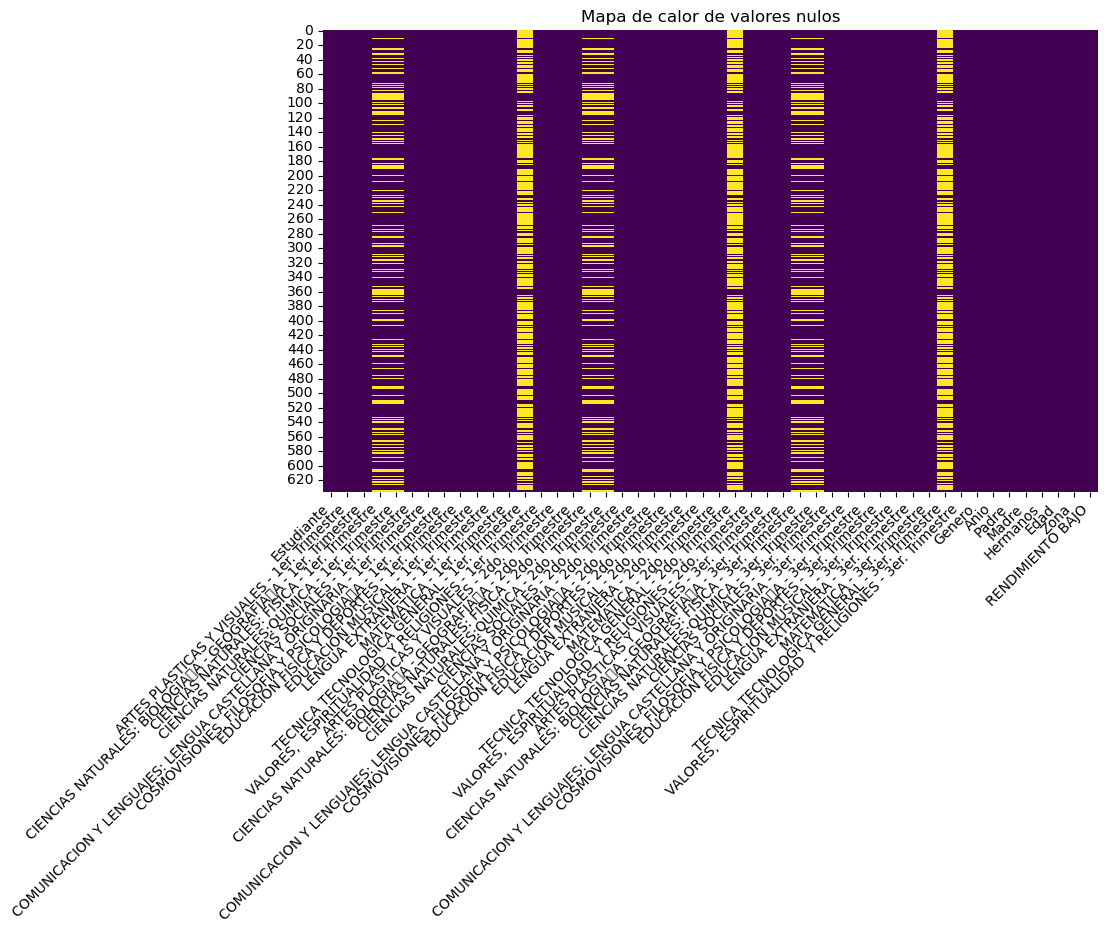

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_centralizado.isnull(), cmap='viridis', cbar=False)
plt.title('Mapa de calor de valores nulos')
plt.xticks(rotation=45, ha='right')
plt.show()

In [6]:
# Eliminamos las columnas cuyo nombre contenga la palabra 'Trimestre' ya que son los parametros que tienen una coprrelacion directa con la variable objetiv
df_centralizado = df_centralizado.drop(columns=[col for col in df_centralizado.columns if 'Trimestre' in col])


In [7]:
df_centralizado.dtypes

Estudiante           int64
Genero              object
Anio                 int64
Padre               object
Madre               object
Hermanos             int64
Edad                 int64
Zona                object
RENDIMIENTO BAJO    object
dtype: object

In [8]:
df_centralizado.head()

,Estudiante,Genero,Anio,Padre,Madre,Hermanos,Edad,Zona,RENDIMIENTO BAJO
0,40029,M,2023,SI,SI,1,15,Cala Cala,NO
1,40069,F,2021,SI,SI,2,12,Centro,NO
2,89798,F,2022,SI,SI,2,13,Quillacollo,NO
3,60006,F,2023,SI,SI,0,15,Norte,NO
4,60020,M,2023,SI,NO,2,14,Sud,SI


In [9]:
# Hacemos un cambio de Variables del campo 'Anio' 
df_centralizado['Anio'] = df_centralizado['Anio'].replace({2021: 3, 2022: 2, 2023: 1})
df_centralizado.rename(columns={'Anio': 'Antiguedad'}, inplace=True)

### Realizamos la tranformación One Hot Encoding en el data frame preparado

In [10]:
# Aplicar One-Hot Encoding a todas las columnas categóricas automáticamente
df_encoded = pd.get_dummies(df_centralizado, columns=['Genero','Padre','Madre','RENDIMIENTO BAJO','Zona'])

# Mostrar las primeras filas del DataFrame resultante
df_encoded.head()

,Estudiante,Antiguedad,Hermanos,Edad,Genero_F,Genero_M,Padre_NO,Padre_SI,Madre_NO,Madre_SI,RENDIMIENTO BAJO_NO,RENDIMIENTO BAJO_SI,Zona_Cala Cala,Zona_Centro,Zona_Norte,Zona_Quillacollo,Zona_Sacaba,Zona_Seminario,Zona_Sud,Zona_Taquina
0,40029,1,1,15,False,True,False,True,False,True,True,False,True,False,False,False,False,False,False,False
1,40069,3,2,12,True,False,False,True,False,True,True,False,False,True,False,False,False,False,False,False
2,89798,2,2,13,True,False,False,True,False,True,True,False,False,False,False,True,False,False,False,False
3,60006,1,0,15,True,False,False,True,False,True,True,False,False,False,True,False,False,False,False,False
4,60020,1,2,14,False,True,False,True,True,False,False,True,False,False,False,False,False,False,True,False


In [ ]:
df_encoded.dtypes

### Realizamos el reescalado de las variables cuantitativas

In [11]:
# Importamos la libreria para el reescalado de variables
from sklearn.preprocessing import StandardScaler

# Definir las variables numéricas
variables_numericas = ['Antiguedad', 'Hermanos', 'Edad']

# Definimos la variable para el proceso de reescalado
scaler = StandardScaler()

# Realizamos el proceso de Reescalado
df_encoded[variables_numericas] = scaler.fit_transform(df_encoded[variables_numericas])

# Mostramos las primeras filas del dataframe resultante
df_encoded.head()


,Estudiante,Antiguedad,Hermanos,Edad,Genero_F,Genero_M,Padre_NO,Padre_SI,Madre_NO,Madre_SI,RENDIMIENTO BAJO_NO,RENDIMIENTO BAJO_SI,Zona_Cala Cala,Zona_Centro,Zona_Norte,Zona_Quillacollo,Zona_Sacaba,Zona_Seminario,Zona_Sud,Zona_Taquina
0,40029,-1.274164,-0.245990,1.697353,False,True,False,True,False,True,True,False,True,False,False,False,False,False,False,False
1,40069,1.137850,0.715332,-0.840708,True,False,False,True,False,True,True,False,False,True,False,False,False,False,False,False
2,89798,-0.068157,0.715332,0.005313,True,False,False,True,False,True,True,False,False,False,False,True,False,False,False,False
3,60006,-1.274164,-1.207311,1.697353,True,False,False,True,False,True,True,False,False,False,True,False,False,False,False,False
4,60020,-1.274164,0.715332,0.851333,False,True,False,True,True,False,False,True,False,False,False,False,False,False,True,False


In [ ]:
# Eliminamos los campos que no formaran parte de la tabla minable
df_encoded.drop('Estudiante', axis=1, inplace=True)
df_encoded.drop('RENDIMIENTO BAJO_NO', axis=1, inplace=True)

In [ ]:
# Exportamos del dataframe en un archivo CSV para la implementacion de los modelos a evaluar.
df_encoded.to_csv('df_tabla_minable.csv', index=False)